# 0. Spesifikasi Sistem

In [ ]:
!cat /proc/cpuinfo

In [ ]:
!cat /proc/meminfo

# 1. Import Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1SGbhECYage9vdGDyqQDFjVo19iyy6EXi"})
downloaded.GetContentFile('Level_0_IRR.zip')

downloaded = drive.CreateFile({'id':"1ABnRxrZAWPk-_QkY-HsWJni8HY27NSpq"})
downloaded.GetContentFile('Level_1_IRR.zip')

downloaded = drive.CreateFile({'id':"1oZGOedCKHJTi9qf6W1oJeIl7q_RbCTwr"})
downloaded.GetContentFile('Level_2_IRR.zip')

downloaded = drive.CreateFile({'id':"1b9lIH4J77hRJkpALSV4bwO88DCboN6I7"})
downloaded.GetContentFile('Level_3_IRR.zip')

downloaded = drive.CreateFile({'id':"13GUUsflH4kf89gJGzRdey4fWH1ZU21k1"})
downloaded.GetContentFile('Level_4_IRR.zip')

downloaded = drive.CreateFile({'id':"1s-HcK8bAnDFVeWio92GM90NJLy3l0oku"})
downloaded.GetContentFile('Level_0_RRIC.zip')

downloaded = drive.CreateFile({'id':"1pHYq6b0pSOoXY_HbOJ78PQj6ru5cb6Kn"})
downloaded.GetContentFile('Level_1_RRIC.zip')

downloaded = drive.CreateFile({'id':"1fA4C_yzvNsv8YIS_B_D1z6ERNdxIdiP6"})
downloaded.GetContentFile('Level_2_RRIC.zip')

downloaded = drive.CreateFile({'id':"15vA5WZgO0Pr3Z-1qQGFMDxdiZEQKvaKJ"})
downloaded.GetContentFile('Level_3_RRIC.zip')

downloaded = drive.CreateFile({'id':"1RuVmzNoaNIev14KW43kfLQkXB-4Mk1-v"})
downloaded.GetContentFile('Level_4_RRIC.zip')

In [ ]:
#unzip data citra karet (Data_Nomor_Crop.zip) dan disimpan dalam Data_Nomor_Crop
!unzip Level_0_IRR.zip -d Level_0_IRR
!unzip Level_1_IRR.zip -d Level_1_IRR
!unzip Level_2_IRR.zip -d Level_2_IRR
!unzip Level_3_IRR.zip -d Level_3_IRR
!unzip Level_4_IRR.zip -d Level_4_IRR

!unzip Level_0_RRIC.zip -d Level_0_RRIC
!unzip Level_1_RRIC.zip -d Level_1_RRIC
!unzip Level_2_RRIC.zip -d Level_2_RRIC
!unzip Level_3_RRIC.zip -d Level_3_RRIC
!unzip Level_4_RRIC.zip -d Level_4_RRIC

Archive:  Level_0_IRR.zip
  inflating: Level_0_IRR/IMG_7971.JPG  
  inflating: Level_0_IRR/IMG_7973.JPG  
  inflating: Level_0_IRR/IMG_7975.JPG  
  inflating: Level_0_IRR/IMG_7977.JPG  
  inflating: Level_0_IRR/IMG_7980.JPG  
  inflating: Level_0_IRR/IMG_7982.JPG  
  inflating: Level_0_IRR/IMG_7984.JPG  
  inflating: Level_0_IRR/IMG_7986.JPG  
  inflating: Level_0_IRR/IMG_7989.JPG  
  inflating: Level_0_IRR/IMG_7991.JPG  
  inflating: Level_0_IRR/IMG_7993.JPG  
  inflating: Level_0_IRR/IMG_7995.JPG  
  inflating: Level_0_IRR/IMG_7997.JPG  
  inflating: Level_0_IRR/IMG_7999.JPG  
  inflating: Level_0_IRR/IMG_8001.JPG  
  inflating: Level_0_IRR/IMG_8003.JPG  
  inflating: Level_0_IRR/IMG_8005.JPG  
  inflating: Level_0_IRR/IMG_8007.JPG  
  inflating: Level_0_IRR/IMG_8009.JPG  
  inflating: Level_0_IRR/IMG_8011.JPG  
  inflating: Level_0_IRR/IMG_8013.JPG  
  inflating: Level_0_IRR/IMG_8015.JPG  
  inflating: Level_0_IRR/IMG_8017.JPG  
  inflating: Level_0_IRR/IMG_8019.JPG  
  inflating: L

# 2. Import Package dan Dataset

## 2.1 Import Package

In [ ]:
import time
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Conv2DTranspose, Reshape, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import figure
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

## 2.2 Import Gambar

In [ ]:
st = time.time()
y = []
data_awal = []

In [ ]:
# ukuran lebar (y)
lebar = 128
# ukuran panjang (x)
panjang = 128

list_path = ['/content/Level_0_IRR', '/content/Level_1_IRR', '/content/Level_2_IRR', '/content/Level_3_IRR', '/content/Level_4_IRR',
            '/content/Level_0_RRIC', '/content/Level_1_RRIC', '/content/Level_2_RRIC','/content/Level_3_RRIC', '/content/Level_4_RRIC']

for i in list_path:
  onlyfiles = [f for f in listdir(i) if isfile(join(i, f))]
  for j in range (0,len(onlyfiles)):
    y.append(int(i[15]))
  #buka gambar disimpen di variabel image
    image = cv2.imread(i+'/'+onlyfiles[j])
  #resize
    image = cv2.resize(image, (panjang,lebar))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #mengubah ke dalam bentuk image dan disimpan ke dalam variabel pixel_value
    pixel_value = np.array(image)
  #memasukan ke list data_awal
    data_awal.append(pixel_value)
data_awal = np.array(data_awal)

In [ ]:
data_awal.shape

(1629, 128, 128, 3)

In [ ]:
y_df = pd.DataFrame(y,columns = ['Label'])
y_df.value_counts()
del(y)

In [ ]:
y_df.value_counts()

Label
3        332
1        327
0        324
4        324
2        322
dtype: int64

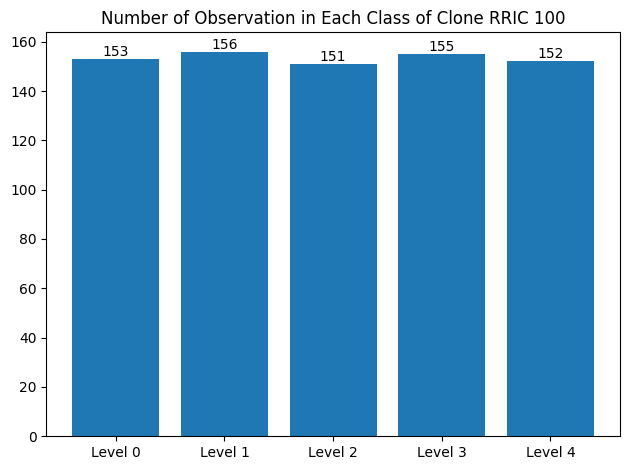

In [ ]:
bar = plt.bar(['Level 0', 'Level 1', 'Level 2','Level 3', 'Level 4'], [153, 156, 151, 155, 152])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.title('Number of Observation in Each Class of Clone RRIC 100')
plt.tight_layout()
plt.show()

# 3. Segmentasi K - Means

In [ ]:
#st = time.time()

## 3.1 Proses Segmentasi



In [ ]:
kelas = 3
iterasi = 100
epsilon = 0.1
centroid_init = cv2.KMEANS_RANDOM_CENTERS
data_segmentasi = []
labels_origin = []

for i in range (0, len(data_awal)):
  #mengubah data citra 3D menjadi 2D
  pixel_values = data_awal[i].reshape((-1, 3))
  #mengubah nilai pixel menjadi float
  pixel_values = np.float32(pixel_values)
  #kriteria konvergensi
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterasi, epsilon)
  #proses segmentasi
  _, labels, (centers) = cv2.kmeans(pixel_values, kelas, None, criteria, 10, centroid_init)
  #mengubah centrodi menjadi bilangan bulat
  centers = np.uint8(centers)

  #mengubah nilai pixel menjadi centroid yang sesuai
  labels = labels.flatten()
  labels_origin.append(labels)
  segmented_image = centers[labels.flatten()]
  segmented_image = segmented_image.reshape((panjang,lebar,3))
  data_segmentasi.append(segmented_image)

In [ ]:
plt.imshow(data_segmentasi[0])

In [ ]:
data_segmentasi = np.array(data_segmentasi)
del(labels_origin)

In [ ]:
data_segmentasi.shape

## 3.2 Hasil Segmentasi

In [ ]:
# indeks = random.randint(0,256)
# indeks = 103

In [ ]:
# result_ori = [data_awal[indeks], data_segmentasi[indeks]]
# for i in range (0,kelas):
#   # disable only the cluster number 2 (turn the pixel into black)
#   masked_image_ori = np.copy(data_segmentasi[indeks])
#   # convert to the shape of a vector of pixel values
#   masked_image_ori = masked_image_ori.reshape((-1, 3))
#   # color (i.e cluster) to disable
#   cluster = i
#   masked_image_ori[labels_origin[indeks] == cluster] = [0,0,0]
#   # convert back to original shape
#   masked_image_ori = masked_image_ori.reshape(data_awal[indeks].shape)
#   result_ori.append(masked_image_ori)


In [ ]:
# labels_origin[103]

In [ ]:
# #figure(figsize=(12,8))
# figure(figsize=(100,50))
# plt.subplot(1,kelas + 2,1)
# plt.imshow(result_ori[0])
# plt.title("Gambar Awal")

# plt.subplot(1,kelas + 2,2)
# plt.imshow(result_ori[1])
# plt.title("hasil segmentasi")

# for i in range (2, kelas + 2):
#   plt.subplot(1,kelas + 2,i + 1)
#   plt.imshow(result_ori[i])
#   plt.title("Cluster"+str(i-1))

# plt.tight_layout()
# plt.show()


# 4. Data Split

In [ ]:
data_split = data_awal/255
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_split, y_df, test_size = 0.2, stratify = y_df['Label'])
#del(data_split)

In [ ]:
x_train_ae, x_val, y_train_ae, y_val = train_test_split(x_train, x_train, test_size = 0.2)

# 5. Feature Extraction

## 5.1 Model Convolutional Autoencoder

In [ ]:
i = Input(shape = (panjang,lebar,3))
conv1 = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(i)
pool1 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(pool1)
pool2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(pool2)
pool3 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(conv3)

bottleneck = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(pool3)

ups1 = tf.keras.layers.UpSampling2D(size=(2, 2))(bottleneck)

transcov1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(ups1)
ups2 = tf.keras.layers.UpSampling2D(size=(2, 2))(transcov1)

transcov2 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(ups2)
ups3 = tf.keras.layers.UpSampling2D(size=(2, 2))(transcov2)

output = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')(ups3)
model = Model(i,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 average_pooling2d (Average  (None, 64, 64, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 8)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

## 5.2 Compiler dan Train Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
r = model.fit(x_train_ae, x_train_ae, validation_data = (x_val, x_val), epochs = 50, batch_size = 32)

Epoch 1/50
33/33 [==============================] - 9s 78ms/step - loss: 0.2056 - val_loss: 0.0441
Epoch 2/50
33/33 [==============================] - 1s 21ms/step - loss: 0.0285 - val_loss: 0.0175
Epoch 3/50
33/33 [==============================] - 1s 21ms/step - loss: 0.0143 - val_loss: 0.0118
Epoch 4/50
33/33 [==============================] - 1s 19ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 5/50
33/33 [==============================] - 1s 19ms/step - loss: 0.0090 - val_loss: 0.0082
Epoch 6/50
33/33 [==============================] - 1s 19ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 7/50
33/33 [==============================] - 1s 19ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 8/50
33/33 [==============================] - 1s 21ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/50
33/33 [==============================] - 1s 21ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 10/50
33/33 [==============================] - 1s 19ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 11/

## 5.3 hasil model

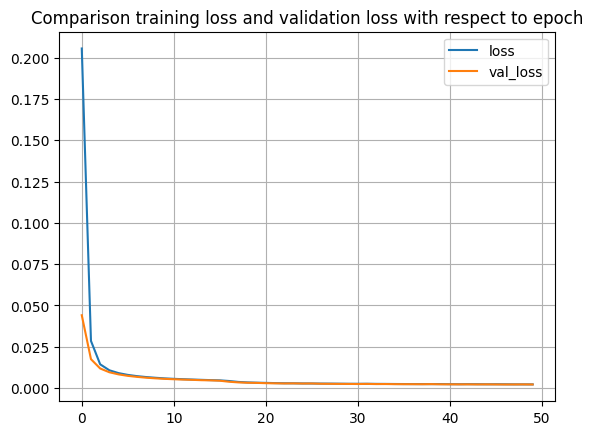

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Comparison training loss and validation loss with respect to epoch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(x_test, x_test)

11/11 [==============================] - 0s 37ms/step - loss: 0.0021


0.0021270422730594873

## 5.4 Data Terkompres

In [ ]:
model_kompres = model.layers[-7].output
model_encoder = Model(inputs = model.input, outputs = model_kompres)
print(model_kompres.shape)

(None, 16, 16, 8)


### 5.4.1 Data Training

In [ ]:
x_train_compressed = model_encoder.predict(x_train)
print(x_train_compressed.shape)

41/41 [==============================] - 1s 14ms/step
(1303, 16, 16, 8)


In [ ]:
x_compressed_flatten = []
for i in range (0, x_train_compressed.shape[0]):
  x_compressed_flatten.append(x_train_compressed[i].flatten(order='C'))
x_compressed_flatten = np.array(x_compressed_flatten)
print(x_compressed_flatten.shape)

(1303, 2048)


### 5.4.2 Data Testing

In [ ]:
x_test_compressed = model_encoder.predict(x_test)
print(x_test_compressed.shape)

11/11 [==============================] - 0s 8ms/step
(326, 16, 16, 8)


In [ ]:
x_test_compressed_flatten = []
for i in range (0, x_test_compressed.shape[0]):
  x_test_compressed_flatten.append(x_test_compressed[i].flatten(order='C'))
x_test_compressed_flatten = np.array(x_test_compressed_flatten)
print(x_test_compressed_flatten.shape)

(326, 2048)


# 6. Klasifikasi

## 6.1 Model Tanpa GSCV

In [ ]:
Anotasi = 'Label'

In [ ]:
y_df[Anotasi] = y_df[Anotasi].astype('int64')

In [ ]:
x_compressed_flatten.shape

(1303, 2048)

In [ ]:
1/(x_compressed_flatten.var()*2048)

0.031416663281043734

In [ ]:
svc_mono = SVC(C = 128, kernel='rbf').fit(x_compressed_flatten, y_train[Anotasi])
y_predict_mono = svc_mono.predict(x_test_compressed_flatten)

print('akurasi = ',accuracy_score(y_test[Anotasi], y_predict_mono))
print('recall macro = ', sklearn.metrics.recall_score(y_test[Anotasi], y_predict_mono, average = 'macro'))
print('precision macro = ', sklearn.metrics.precision_score(y_test[Anotasi], y_predict_mono, average='macro'))
print('f1 score macro = ', sklearn.metrics.f1_score(y_test[Anotasi], y_predict_mono, average = 'macro'))
print(accuracy_score(y_test[Anotasi], y_predict_mono))

confusion_matrix(y_test[Anotasi],y_predict_mono)

akurasi =  0.852760736196319
recall macro =  0.8524698622273249
precision macro =  0.8556131172773597
f1 score macro =  0.8535187652070915
0.852760736196319


array([[54, 11,  0,  0,  0],
       [ 9, 52,  4,  0,  0],
       [ 3,  7, 54,  0,  0],
       [ 0,  0,  1, 60,  6],
       [ 0,  0,  0,  7, 58]])

In [ ]:
print('akurasi = ',accuracy_score(y_train[Anotasi], svc_mono.predict(x_compressed_flatten)))

akurasi =  0.9884881043745203


In [ ]:
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 281.40517473220825 seconds


## 6.2 Train GSCV untuk mencari Parameter Terbaik

In [ ]:
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
parameter = {'kernel' : ['rbf'], 'gamma' : gamma_range, 'C' : C_range}
cv = 2
scoring = 'accuracy'

GSCV_normal = GridSearchCV(SVC(), param_grid = parameter, scoring = scoring,cv = cv, return_train_score = True)
resultsnormal = GSCV_normal.fit(x_compressed_flatten, y_train[Anotasi])

In [ ]:
results_normal_df = pd.DataFrame.from_dict(resultsnormal.cv_results_)
results_normal_df[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'C': 0.01, 'gamma': 1e-09, 'kernel': 'rbf'}",0.203376,0.203376
1,"{'C': 0.01, 'gamma': 1e-06, 'kernel': 'rbf'}",0.203376,0.203376
2,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.203376,0.203376
3,"{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}",0.203376,0.203376
4,"{'C': 0.01, 'gamma': 1000.0, 'kernel': 'rbf'}",0.203376,0.203376
5,"{'C': 10.0, 'gamma': 1e-09, 'kernel': 'rbf'}",0.203376,0.203376
6,"{'C': 10.0, 'gamma': 1e-06, 'kernel': 'rbf'}",0.203376,0.203376
7,"{'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}",0.598619,0.573283
8,"{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}",1.000000,0.756723
9,"{'C': 10.0, 'gamma': 1000.0, 'kernel': 'rbf'}",1.000000,0.203376


In [ ]:
results_normal_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.513568,0.002215,0.600778,0.005623,0.01,0.0,rbf,"{'C': 0.01, 'gamma': 1e-09, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
1,0.526151,0.007842,0.604798,0.000386,0.01,0.000001,rbf,"{'C': 0.01, 'gamma': 1e-06, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
2,0.576040,0.028003,0.747538,0.102525,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
3,0.506862,0.004249,0.589273,0.014101,0.01,1.0,rbf,"{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
4,0.511572,0.001576,0.609975,0.012805,0.01,1000.0,rbf,"{'C': 0.01, 'gamma': 1000.0, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
5,0.552867,0.048561,0.709079,0.108982,10.0,0.0,rbf,"{'C': 10.0, 'gamma': 1e-09, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
6,0.523720,0.001141,0.578815,0.009363,10.0,0.000001,rbf,"{'C': 10.0, 'gamma': 1e-06, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,0.202765,0.203988,0.203376,0.000611
7,0.384469,0.000850,0.590638,0.005762,10.0,0.001,rbf,"{'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}",0.585890,0.560676,0.573283,0.012607,11,0.599078,0.598160,0.598619,0.000459
8,0.565293,0.076660,0.678313,0.077149,10.0,1.0,rbf,"{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}",0.746933,0.766513,0.756723,0.009790,6,1.000000,1.000000,1.000000,0.000000
9,0.554353,0.034574,0.739431,0.121096,10.0,1000.0,rbf,"{'C': 10.0, 'gamma': 1000.0, 'kernel': 'rbf'}",0.203988,0.202765,0.203376,0.000611,14,1.000000,1.000000,1.000000,0.000000


In [ ]:
GSCV_normal.best_params_

{'C': 10000000.0, 'gamma': 0.001, 'kernel': 'rbf'}

## 6.3 Testing Model GSCV

In [ ]:
y_predict = GSCV_normal.predict(x_test_compressed_flatten)

In [ ]:
print('akurasi = ',accuracy_score(y_test[Anotasi], y_predict))
print('recall macro = ', sklearn.metrics.recall_score(y_test[Anotasi], y_predict, average = 'macro'))
print('precision macro = ', sklearn.metrics.precision_score(y_test[Anotasi], y_predict, average='macro'))
print('f1 score macro = ', sklearn.metrics.f1_score(y_test[Anotasi], y_predict, average = 'macro'))

akurasi =  0.8650306748466258
recall macro =  0.8647337830080367
precision macro =  0.865892041572266
f1 score macro =  0.8650773770176755


In [ ]:
confusion_matrix(y_test[Anotasi], y_predict)

array([[56,  9,  0,  0,  0],
       [11, 49,  5,  0,  0],
       [ 2,  7, 55,  0,  0],
       [ 0,  0,  2, 61,  4],
       [ 0,  0,  0,  4, 61]])

In [ ]:
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 365.3325705528259 seconds


# 7. Saving Model

In [ ]:
del(model)

In [ ]:
model_encoder.save('Autoencoder')

In [ ]:
import shutil
from google.colab import files
shutil.make_archive('Autoencoder', 'zip', 'Autoencoder')
files.download("Autoencoder.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import dump, load
dump(svc_mono, 'SVM.joblib')

['SVM.joblib']

In [ ]:
kelas = 1
iterasi = 100
epsilon = 0.01
centroid_init = cv2.KMEANS_RANDOM_CENTERS
data_segmentasi = []
labels_origin = []
sample = 148

#mengubah data citra 3D menjadi 2D
pixel_values = data_awal[sample].reshape((-1, 3))
#mengubah nilai pixel menjadi float
pixel_values = np.float32(pixel_values)
  #kriteria konvergensi
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterasi, epsilon)
  #proses segmentasi
_, labels, (centers) = cv2.kmeans(pixel_values, kelas, None, criteria, 10, centroid_init)
  #mengubah centrodi menjadi bilangan bulat
centers = np.uint8(centers)

  #mengubah nilai pixel menjadi centroid yang sesuai
labels = labels.flatten()
labels_origin.append(labels)
segment_image = centers[labels.flatten()]
segment_image = segment_image.reshape((256,256,3))
#plt.imshow(segment_image)
#plt.show()

ValueError: cannot reshape array of size 49152 into shape (256,256,3)

In [ ]:
y_drop[sample:sample+1]

In [ ]:
old1 = model_encoder.predict(np.expand_dims(segment_image/255, axis = 0))
old2 = GSCV_normal.predict(old1.reshape(1,8192))
print(old2)
print()

new_model = tf.keras.models.load_model('my_model0.69')
new1 = new_model.predict(np.expand_dims(segment_image/255, axis = 0))
new2 = load('filename0.69.joblib')
new3 = new2.predict(new1.reshape(1,8192))
print(new3)

print(new1.reshape(1,8192)==old1.reshape(1,8192))
print()

In [ ]:
!unzip Autoencoder.zip -d Autoencoder

In [ ]:
from flask import Flask, render_template, request, jsonify
import tensorflow as tf
import sklearn
import numpy as np
import cv2
from joblib import load
import time
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt
import webbrowser


def preprocess(path):
    return path

def segmentation(batch):
    pixel_values = batch.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)
    _, labels, (centers) = cv2.kmeans(pixel_values, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((256,256,3))
    segmented_image = np.expand_dims(segmented_image, axis=0)
    return segmented_image

def autoencoder(segmented):
    model_autoencoder = tf.keras.models.load_model('Autoencoder')
    extracted = model_autoencoder.predict(np.expand_dims(segmented,axis = 0))
    extracted1 = extracted.reshape(1,8192)
    return extracted1

def classification(extracted):
    SVM = load('SVM.joblib')
    prediction = SVM.predict(extracted)
    return prediction

def predict(path):
    print("WORKING 1")
    #processed_image = preprocess(path)
    #print("WORKING 2")
    #segmented_image = segmentation(processed_image)
    #print("WORKING 3")
    extracted_image = autoencoder(path)
    print("WORKING 4")
    image_prediction = classification(extracted_image)
    print("WORKING 5")
    return image_prediction[0]

print()
print(predict(segment_image/255))

In [ ]:
y_predict

In [ ]:
new1.reshape(1,8192).shape

In [ ]:
old1.reshape(1,8192) == new1.reshape(1,8192)

In [ ]:
from google.colab import files
files.download("SVM.joblib")